## Spike Data Analysis

神経細胞はスパイクと呼ばれる活動電位によって互いに情報を交換する．神経細胞集団の電気活動を分析する上で中心となるのはスパイク時刻の情報である．多電極アレイでは，各電極についてスパイク時刻の列 (spike train) が取得されるが，本章ではそのようなデータの可視化方法について述べる．  

Neurons exchange information with each other by means of action potentials called spikes. Spike times are central to the analysis of the electrical activity of a neuronal population. In a multi-electrode array, a sequence of spike times is obtained for each electrode, and this chapter describes how to visualize such data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

In [2]:
datadir = '../datasets/'
df_map = pd.read_csv(datadir + 'mapping.csv', index_col=0)
df_sp = pd.read_csv(datadir + 'spikes.csv', index_col=0)

`df_map` stores each electrode's information (x, y), and `df_sp` stores information on the electrode and time when each spike was detected.

In [3]:
display(df_map.head())
display(df_sp.head())

,channel,x,y
0,0,875.0,1505.0
1,1,3132.5,1242.5
2,2,647.5,1417.5
3,3,2870.0,1032.5
4,4,700.0,682.5


,channel,amplitude,spiketime
0,342,18.561750,0.00000
1,382,22.953043,0.00005
2,708,36.348030,0.09220
3,824,42.317764,0.09220
4,852,46.456272,0.09225


スパイク時系列は, スパイク時刻と発生電極を両軸に取ったグラフにより可視化できる.  
 
The spike train can be visualized as a figure with the spike time and the generating electrode on both axes, which is called a raster plot.

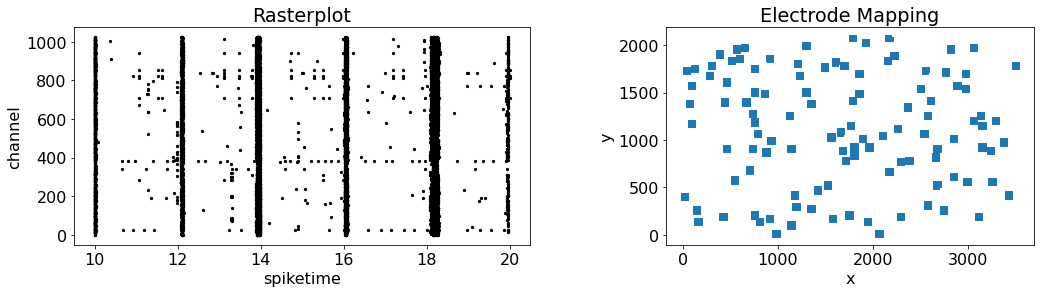

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# rasterplot
df_sp.query('10 < spiketime < 20').plot.scatter(ax=ax1, x='spiketime', y='channel', c='k', s=5)
ax1.set_title('Rasterplot')

# visualize electrode mapping
df_map.plot.scatter(ax=ax2, x='x', y='y', marker='s', c='C0')
ax2.set_title('Electrode Mapping')
ax2.set_aspect('equal')

plt.show()

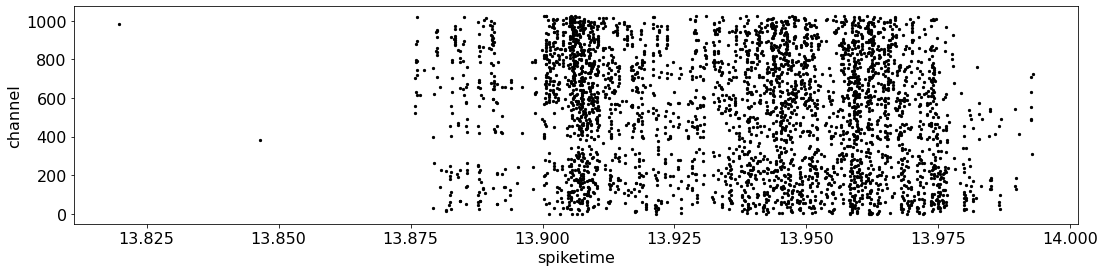

In [5]:
fig, ax = plt.subplots(figsize=(18, 4))
df_sp.query('13.8 < spiketime < 14.0').plot.scatter(ax=ax, x='spiketime', y='channel', c='k', s=5)
plt.show()

In [6]:
def channel_stats(df_sp: pd.DataFrame, df_map: pd.DataFrame):
    duration = df_sp.spiketime.max() - df_sp.spiketime.min()
    groups = df_sp[['channel', 'amplitude']].groupby('channel')
    
    df_fr = pd.DataFrame(groups.size() / duration, columns=['firing_rate'])  # firing rate for each channel
    df_amp = groups.mean()  # mean spike amplitude for each channel
    
    df_stat = pd.concat([df_map.set_index('channel'), df_fr, df_amp], axis=1, join='inner')
    return df_stat

In [7]:
df_stat = channel_stats(df_sp, df_map)
display(df_stat.head())

,x,y,firing_rate,amplitude
channel,,,,
0,875.0,1505.0,2.303333,68.872199
1,3132.5,1242.5,0.976667,153.558120
2,647.5,1417.5,2.800000,332.676633
3,2870.0,1032.5,0.450000,37.887843
4,700.0,682.5,1.723333,299.170993


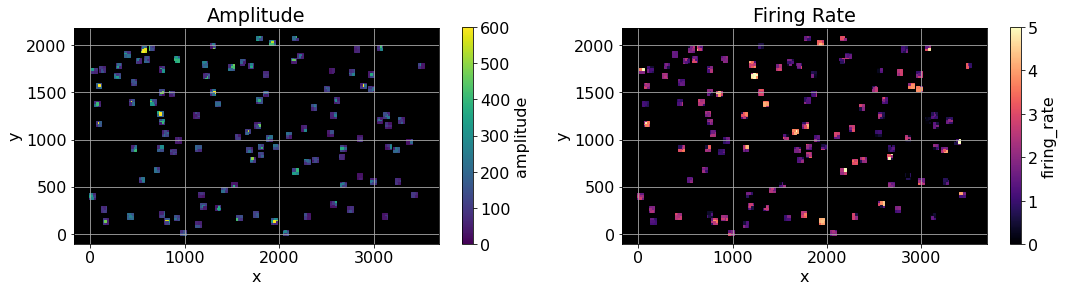

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

# mean amplitude
df_stat.plot.scatter(ax=ax1, x='x', y='y', marker='s', s=5, c='amplitude', cmap='viridis', vmin=0.0, vmax=600.0)
ax1.set_title('Amplitude')
ax1.set_aspect('equal')
ax1.set_facecolor('k')
ax1.grid()

# mean firing rate
df_stat.plot.scatter(ax=ax2, x='x', y='y', marker='s', s=5, c='firing_rate', cmap='magma', vmin=0.0, vmax=5.0)
ax2.set_title('Firing Rate')
ax2.set_aspect('equal')
ax2.set_facecolor('k')
ax2.grid()

plt.show()

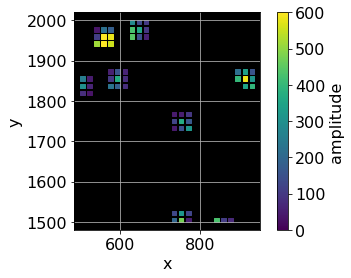

In [9]:
fig, ax = plt.subplots()
df_stat.query('500 < x < 1000 and 1500 < y < 2000').plot.scatter(ax=ax, x='x', y='y', marker='s', s=20, c='amplitude', cmap='viridis', vmin=0.0, vmax=600.0)
ax.set_aspect('equal')
ax.set_facecolor('k')    
ax.grid()    
plt.show() 